
## <font color='Orange'>**Netflix: Visualization, Analaysis and Insights**</font>

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install gdown

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1AcB2V-ACneDf-gNMA8Ls0Sf8D8uxdmR-/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1AcB2V-ACneDf-gNMA8Ls0Sf8D8uxdmR-
To: /content/netflix_clean.csv
100% 26.0M/26.0M [00:00<00:00, 58.6MB/s]


In [ ]:
netflix_analysis=pd.read_csv('netflix_clean.csv')
df_analysis = netflix_analysis.copy()

In [ ]:
df_analysis.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s2,TV Show,Blood & Water,unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
3,s2,TV Show,Blood & Water,unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
4,s2,TV Show,Blood & Water,unknown,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
5,s2,TV Show,Blood & Water,unknown,Dillon Windvogel,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
6,s2,TV Show,Blood & Water,unknown,Natasha Thahane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
7,s2,TV Show,Blood & Water,unknown,Arno Greeff,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
8,s2,TV Show,Blood & Water,unknown,Xolile Tshabalala,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
9,s2,TV Show,Blood & Water,unknown,Getmore Sithole,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons


In [ ]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89382 entries, 0 to 89381
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         89382 non-null  object 
 1   type            89382 non-null  object 
 2   title           89382 non-null  object 
 3   director        89382 non-null  object 
 4   cast            89382 non-null  object 
 5   country         89370 non-null  object 
 6   date_added      88553 non-null  object 
 7   release_year    89382 non-null  int64  
 8   rating          89382 non-null  object 
 9   duration        89379 non-null  object 
 10  listed_in       89382 non-null  object 
 11  description     89382 non-null  object 
 12  duration_value  89379 non-null  float64
 13  duration_unit   89379 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.5+ MB


**date_added col is in object dtype, it should be converted into datetime64[ns]**

In [ ]:
df_analysis['date_added']=pd.to_datetime(df_analysis['date_added'], errors='coerce')

In [ ]:
#checking the dtype of 'date_added' column
df_analysis['date_added'].dtype

dtype('<M8[ns]')

#**Visualization**

**Q.1: What type of content dominates Netflix’s catalog?**

- **Goal: Understanding the type of data Netflix contain**

- **Visualization: Number of Movies VS TV Shows**

- **Insight: According to the visualization we can conclude that Netflix's catalog is   dominated by movies comparing to TV Show.**

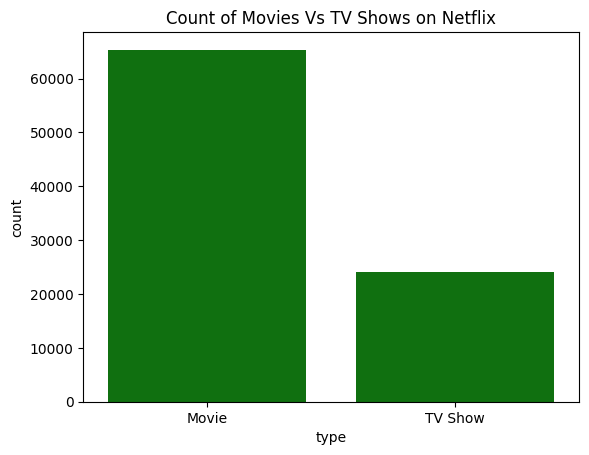

In [ ]:
type_counts=df_analysis['type'].value_counts()
sns.countplot(x='type', data=df_analysis, color='g')
plt.xlabel='Type'
plt.ylabel='Count of Type'
plt.title('Count of Movies Vs TV Shows on Netflix')
plt.show()

**Q.2: How has Netflix’s content library grown over time?**

- **Goal: Understanding the trend of content added over the years**

- **Visualization: Number of titles added every years**

- **Insight: The visualization shows that the number of titles added increased significantly just after 2014. This explains that Netflix's growth across the world and content uploading strategy.**

In [ ]:
#extracting the year from 'date_added' column
df_analysis['year_added'] = df_analysis['date_added'].dt.year
df_analysis['year_added'] = df_analysis['year_added'].astype('Int64')

In [ ]:
#counting the years
year_counts = df_analysis['year_added'].value_counts().sort_index()
#the reason for sorting is, without it the value_counts() will give data
#not in chronological orders
year_counts

,count
year_added,
2008,7
2009,18
2010,10
2011,200
2012,27
2013,70
2014,288
2015,803
2016,3997


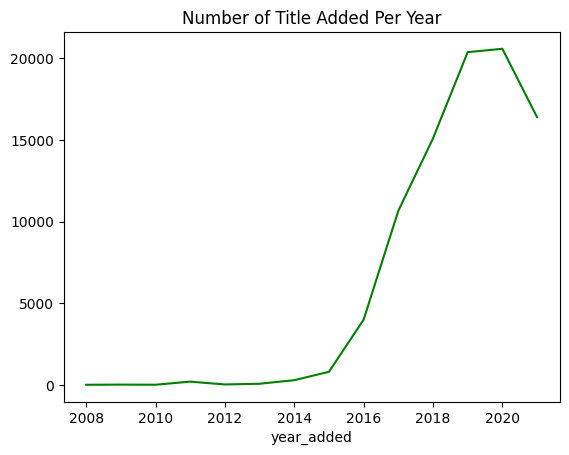

In [ ]:
sns.lineplot(x=year_counts.index, y=year_counts.values, color='g')
plt.title('Number of Title Added Per Year')
plt.show()

**Q.3: Has Netflix shifted its focus from movies to TV shows?**

- **Goal: Movies Vs TV Shows over the time**

- **Visualization: identifying whether movies or tv shows gets more attention on netflix**

- **Insight:While movies consistently dominate the catalog of Netflix, but analyzing the visualization we can say that TV Shows are also growing and is maximum in 2020. We can say that Netflix is focusing on TV Shows as well for more user engagement and views.**

In [ ]:
title_counts = df_analysis['type'].value_counts()

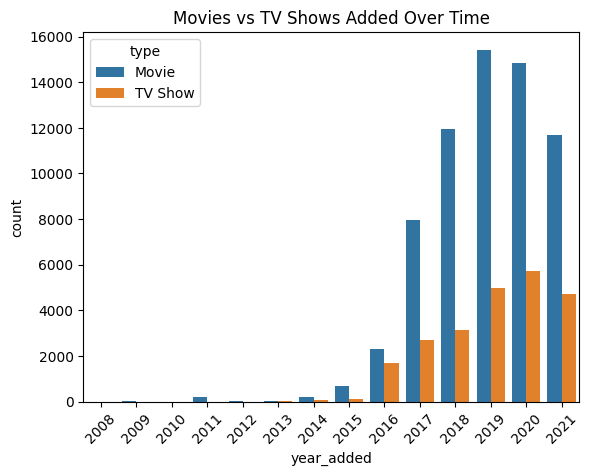

In [ ]:
sns.countplot(x='year_added', hue='type', data=df_analysis)
plt.xticks(rotation=45)
plt.title('Movies vs TV Shows Added Over Time')
plt.show()

**Q.4: Which countries contribute the most content to Netflix?**

- **Goal: Top content producing 3 countries**

- **Visualization:Identifying top content producers countries**

- **Insight: The United States, India and United Kingdom are the three countries where Netflix's presence is very engaging and consistently growing international content.**


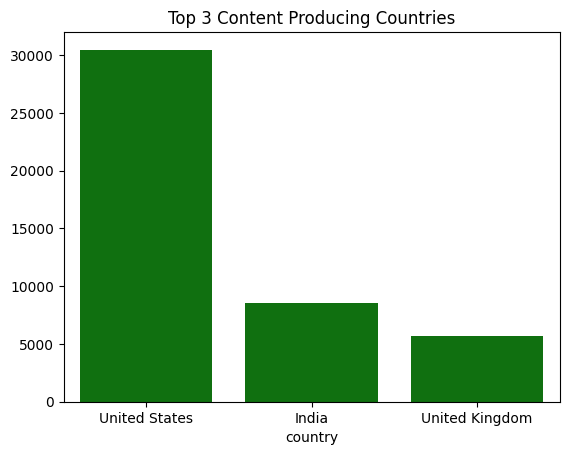

In [ ]:
top_country=df_analysis['country'].value_counts().head(3)
plt.figure()
sns.barplot(x=top_country.index, y=top_country.values, color='green')
plt.title('Top 3 Content Producing Countries')
plt.show()

**Q.4: Does Netflix prioritize international content?**

- **Goal: What kind of geners Netflix prefer**

- **Visualization: Top 10 geners on Netflix**

- **Insight: Drama and International movies are the most common genres on Netflix. This catalog suggest that Netflix spreading regional content for the global audience**

In [ ]:
#splitting one genre per row
genres=df_analysis['listed_in'].str.split(', ').explode()
#counting genres and top 10 genres
genres_count=genres.value_counts().head(10)
genres_count


,count
listed_in,
Dramas,29775
International Movies,28211
Comedies,20829
International TV Shows,12845
Action & Adventure,12216
Independent Movies,9834
Children & Family Movies,9771
TV Dramas,8942
Thrillers,7107


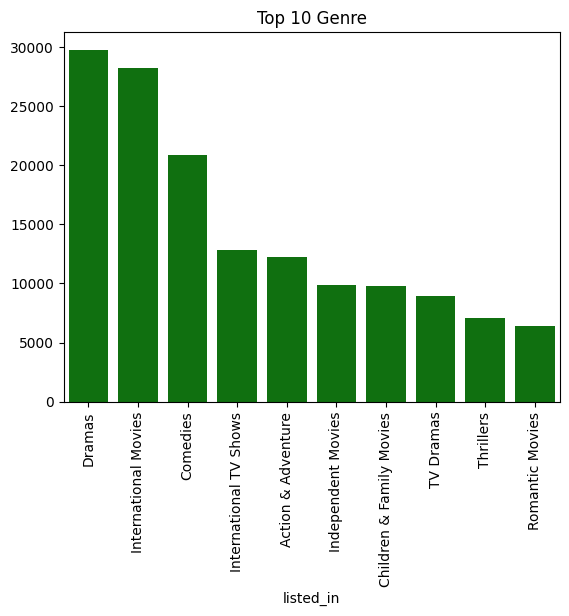

In [ ]:
plt.figure()
sns.barplot(x=genres_count.index, y=genres_count.values, color='green')
plt.title('Top 10 Genre')
plt.xticks(rotation=90)

plt.show()

**Q:5: What are the most common genres on Netflix?**

- **Goal: Understand target audience (kids, teens, adults)**

- **Visualization: Top 10 Content rating distribution**

- **Insight: Most of the content available on Netflix's catalog is for mature audience, suggesting that the platforms targeting adult audience. Although, rating of family-friendly indicate that Netflix is also focusing to lift up such movies and TV Shows.**

In [ ]:
#Rating Abrevation
#=>TV_MA='Mature Audience'
#=>TV-14='Content not sutiable for children below 14'
#=>R: 'Adult-oriented material'
#=>PG-13:'Parents strongly cautioned'
#=>TV-PG:'Parental guidance suggested'
#=>PG: 'Not sutiable for children'
#=>TV-Y7: 'for children ages 7 and older'
#=>TV-Y:'appropriate for all children'
#=>TV-G: 'For general audience'
#=>G:' for all ages and all patrons'

In [ ]:
rating_count=df_analysis['rating'].value_counts().head(10)
rating_count

,count
rating,
TV-MA,29860
TV-14,17437
R,12865
PG-13,7814
TV-PG,6356
PG,5182
TV-Y7,4073
TV-Y,2745
TV-G,1329


Text(0.5, 1.0, 'Top 10 ratiing')

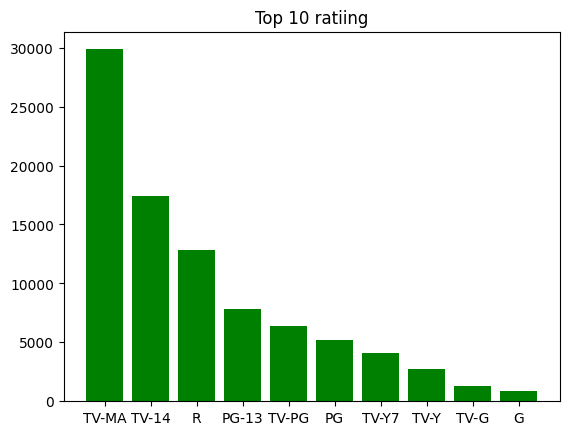

In [ ]:
plt.figure()
x_bar=rating_count.index
y_bar=rating_count.values
plt.bar(x_bar,y_bar, color='g')
plt.title('Top 10 ratiing')

#**Final Conclusion**

Through the exploratory data analysis, we observed that Netflix's content strategy supports matured-rated content with strong engagement in the United States, India and United Kingdom and in international markets. It can be seen that TV Shows and original series are lifted up for global audience for all ages yet require more engagement and expansion.